In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st


In [2]:
df = pd.read_csv(r"C:\Users\Owner\OneDrive\Documents\data_science\fpl_data_1819.csv")

In [3]:
df.head()

,Player,Pos,Squad,Min,Mn/MP,90s,Subs,Gls,Sh,SoT,...,CrdY,CrdR,Fls,Off,OG,Recov,total_points,CBI,PK_miss,succ_tackle
0,Patrick van Aanholt,DF,Crystal Palace,3195.0,89.0,35.5,0,3,44,12,...,3,0,12,11,0,331,140,201,0,18
1,Sergio Agüero,FW,Manchester City,2459.0,75.0,27.3,2,21,118,41,...,4,0,22,26,0,129,201,31,0,11
2,Nathan Aké,DF,Bournemouth,3411.0,90.0,37.9,0,4,22,8,...,3,0,28,2,0,353,120,339,0,14
3,Marc Albrighton,FW,Leicester City,1625.0,60.0,18.1,9,2,19,7,...,3,0,10,2,0,157,63,71,0,9
4,Toby Alderweireld,DF,Tottenham,2922.0,86.0,32.5,1,0,17,6,...,3,0,10,1,1,356,107,241,0,5


In [4]:
df.shape

(390, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        390 non-null    object 
 1   Pos           390 non-null    object 
 2   Squad         390 non-null    object 
 3   Min           390 non-null    float64
 4   Mn/MP         390 non-null    float64
 5   90s           390 non-null    float64
 6   Subs          390 non-null    int64  
 7   Gls           390 non-null    int64  
 8   Sh            390 non-null    int64  
 9   SoT           390 non-null    int64  
 10  Sh/90         390 non-null    float64
 11  SoT/90        390 non-null    float64
 12  PK            390 non-null    int64  
 13  PKatt         390 non-null    int64  
 14  xG            390 non-null    float64
 15  Cmp           390 non-null    int64  
 16  Att           390 non-null    int64  
 17  Cmp%          390 non-null    float64
 18  Ast           390 non-null    

In [6]:
df.describe()

,Min,Mn/MP,90s,Subs,Gls,Sh,SoT,Sh/90,SoT/90,PK,...,CrdY,CrdR,Fls,Off,OG,Recov,total_points,CBI,PK_miss,succ_tackle
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,1487.135897,62.482051,16.525128,4.564103,2.443590,21.184615,7.094872,1.382949,0.472359,0.200000,...,2.628205,0.102564,16.941026,3.497436,0.076923,151.530769,64.384615,84.530769,0.043590,7.058974
std,1021.795151,23.804008,11.354536,4.744879,3.953541,23.156376,9.259122,1.449765,0.663247,0.899014,...,2.697752,0.320256,13.900828,6.533579,0.319432,124.261387,51.584466,84.361310,0.269528,9.788200
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-14.000000
25%,601.500000,48.000000,6.725000,1.000000,0.000000,4.000000,1.000000,0.450000,0.082500,0.000000,...,1.000000,0.000000,6.000000,0.000000,0.000000,50.000000,24.000000,21.000000,0.000000,0.000000
50%,1409.500000,69.000000,15.650000,3.000000,1.000000,14.000000,3.000000,0.965000,0.245000,0.000000,...,2.000000,0.000000,14.000000,1.000000,0.000000,125.500000,54.500000,58.000000,0.000000,4.000000
75%,2380.750000,82.000000,26.475000,7.000000,3.000000,29.000000,9.000000,1.965000,0.690000,0.000000,...,4.000000,0.000000,25.000000,3.000000,0.000000,224.750000,92.000000,125.500000,0.000000,11.000000
max,3420.000000,90.000000,38.000000,23.000000,22.000000,135.000000,60.000000,13.850000,6.920000,10.000000,...,14.000000,2.000000,80.000000,53.000000,3.000000,536.000000,259.000000,409.000000,3.000000,59.000000


In [7]:
df.describe(include=['object'])

,Player,Pos,Squad
count,390,390,390
unique,390,3,17
top,Samir Nasri,DF,Manchester Utd
freq,1,152,27


In [8]:
# Selecting numerical features from the dataframe
num_features = df.select_dtypes(include=[np.number])
num_features.columns

Index(['Min', 'Mn/MP', '90s', 'Subs', 'Gls', 'Sh', 'SoT', 'Sh/90', 'SoT/90',
       'PK', 'PKatt', 'xG', 'Cmp', 'Att', 'Cmp%', 'Ast', 'xA', 'KP',
       'FinalThird', 'PPA', 'CrsPA', 'Tkl', 'TklW', 'Blocks', 'Int', 'Clr',
       'Err', 'CrdY', 'CrdR', 'Fls', 'Off', 'OG', 'Recov', 'total_points',
       'CBI', 'PK_miss', 'succ_tackle'],
      dtype='object')

In [9]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) < 25]
print("Discrete variables count: {}".format(len(discrete_features)))

Discrete variables count: 10


In [10]:
df[discrete_features].head()

,Subs,Gls,PK,PKatt,Ast,Err,CrdY,CrdR,OG,PK_miss
0,0,3,0,0,2,1,3,0,0,0
1,2,21,2,2,8,0,4,0,0,0
2,0,4,0,0,0,0,3,0,0,0
3,9,2,0,0,2,0,3,0,0,0
4,1,0,0,0,0,1,3,0,1,0


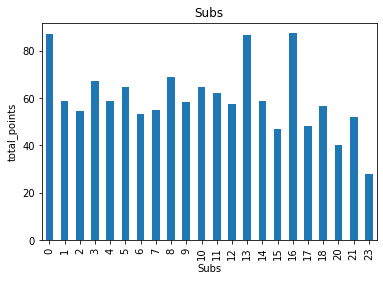

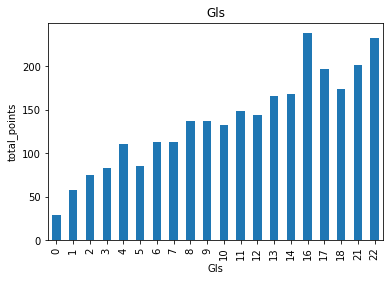

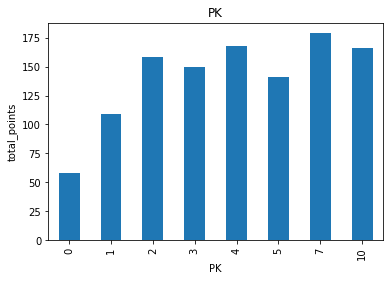

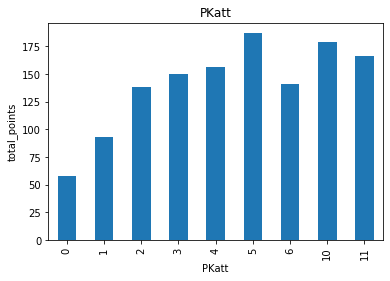

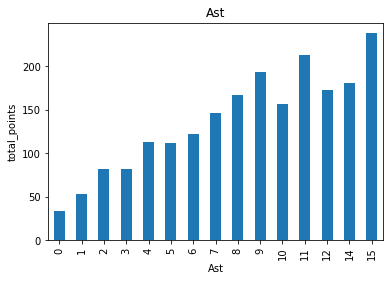

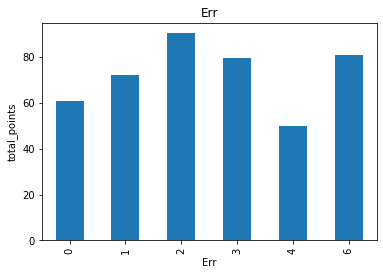

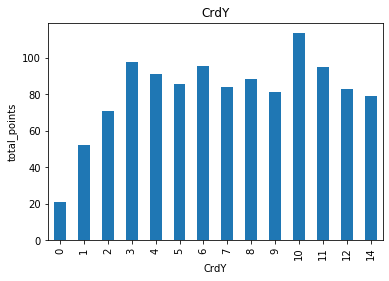

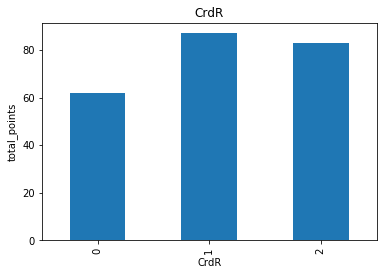

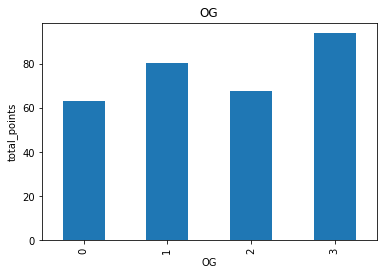

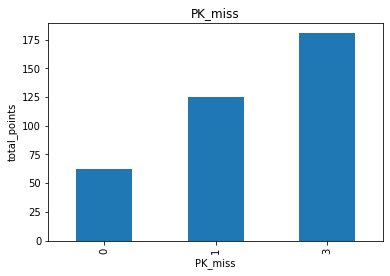

In [11]:
# Find relationship between discrete variables and the total_points of the following season
for feature in discrete_features:
    data = df.copy()
    data.groupby(feature)['total_points'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('total_points')
    plt.title(feature)
    plt.show()

In [12]:
contin_features = [feature for feature in num_features if feature not in discrete_features]
print("Continuous variables count: {}".format(len(contin_features)))

Continuous variables count: 27


In [13]:
df[contin_features]['Cmp%'].head()

0    80.9
1    84.7
2    86.4
3    59.1
4    88.3
Name: Cmp%, dtype: float64

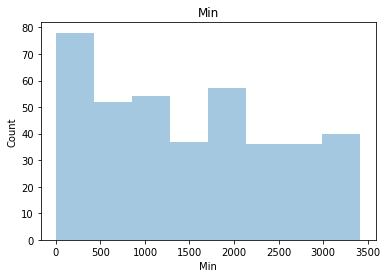

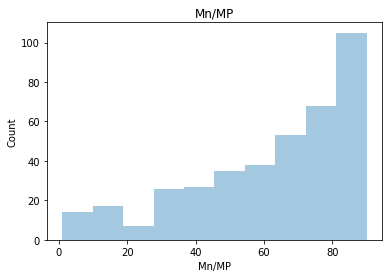

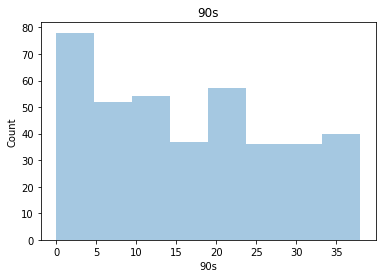

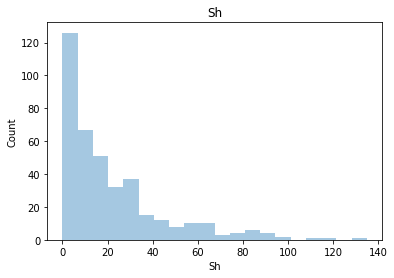

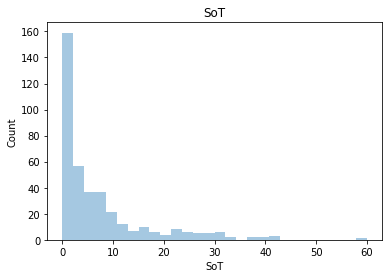

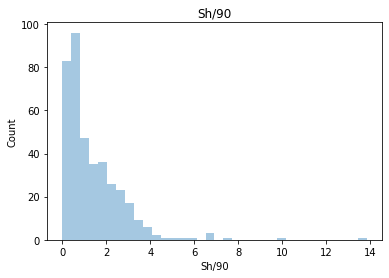

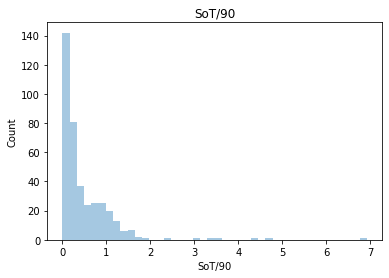

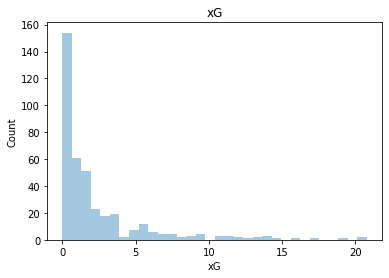

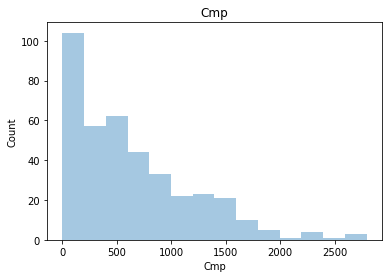

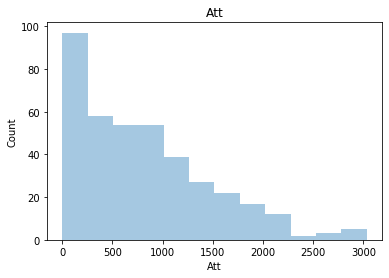

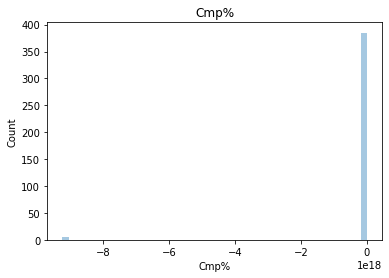

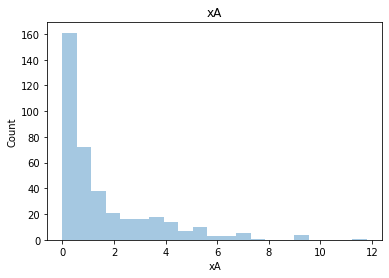

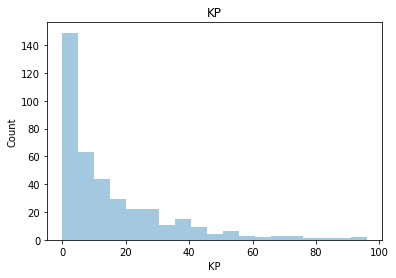

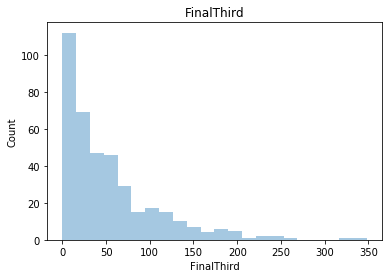

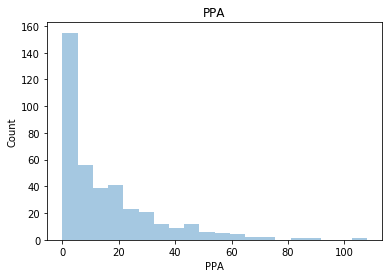

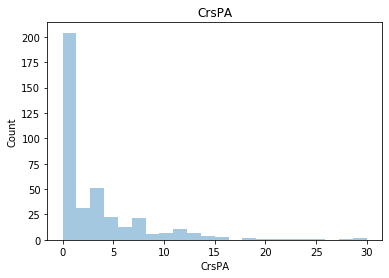

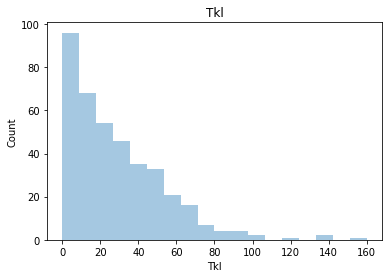

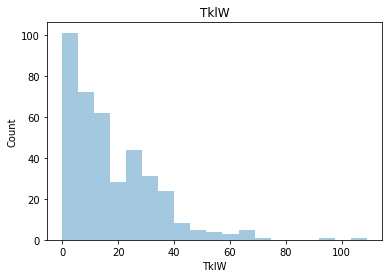

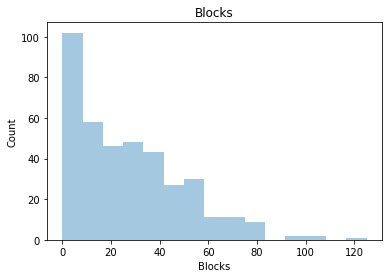

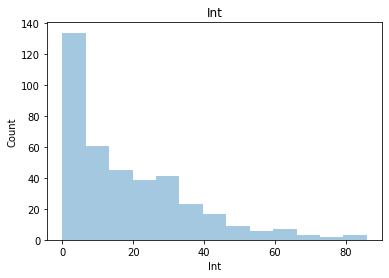

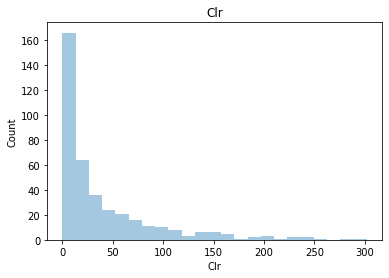

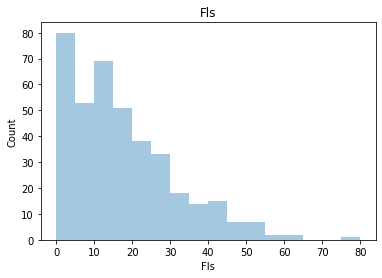

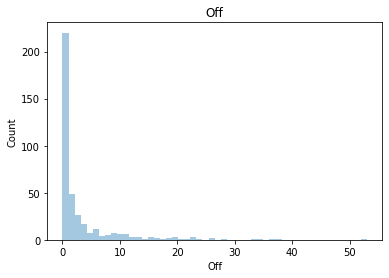

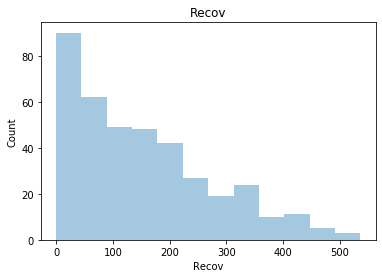

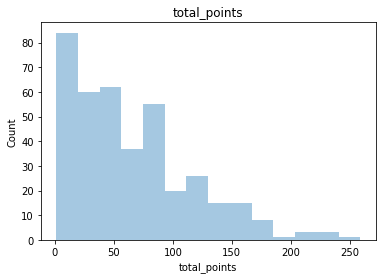

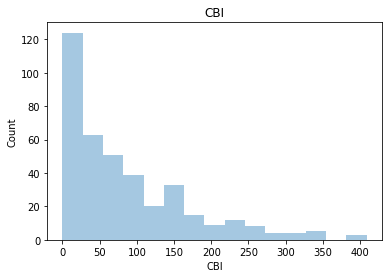

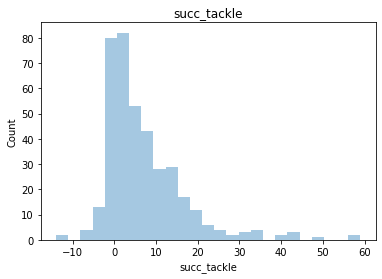

In [14]:
# Determine distribution of continuous variables
for feature in contin_features:
    data = df.copy()
    sns.distplot(a=data[feature], kde=False)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [15]:
df.skew(), df.kurtosis()

(Min             0.185715
 Mn/MP          -0.886506
 90s             0.185240
 Subs            1.420078
 Gls             2.522301
 Sh              1.745457
 SoT             2.100096
 Sh/90           3.130965
 SoT/90          4.364292
 PK              6.380642
 PKatt           6.370673
 xG              2.648327
 Cmp             1.130299
 Att             0.933130
 Cmp%           -8.694480
 Ast             2.118240
 xA              1.876547
 KP              1.832746
 FinalThird      1.810884
 PPA             1.765590
 CrsPA           2.432397
 Tkl             1.405522
 TklW            1.567763
 Blocks          0.978612
 Int             1.245191
 Clr             2.150712
 Err             3.028574
 CrdY            1.493575
 CrdR            3.091839
 Fls             1.055225
 Off             3.428460
 OG              4.967723
 Recov           0.806864
 total_points    0.964052
 CBI             1.389123
 PK_miss         8.086065
 succ_tackle     1.970780
 dtype: float64,
 Min             -1.1

In [16]:
correlation = num_features.corr()
print(correlation['total_points'].sort_values(ascending=False),'\n')

total_points    1.000000
90s             0.861695
Min             0.861672
Sh              0.814927
xA              0.778597
SoT             0.774920
Gls             0.761982
KP              0.748258
xG              0.737154
PPA             0.735293
Att             0.724946
Ast             0.713337
Cmp             0.685711
Recov           0.631080
Fls             0.626954
Mn/MP           0.588500
Blocks          0.580146
FinalThird      0.558616
Off             0.531576
TklW            0.518476
Tkl             0.514735
CrsPA           0.458484
Int             0.442626
CBI             0.432943
succ_tackle     0.396425
CrdY            0.395385
PKatt           0.388458
PK              0.385755
Clr             0.293209
PK_miss         0.252838
Cmp%            0.138882
CrdR            0.137965
Err             0.117242
SoT/90          0.112384
Sh/90           0.109506
OG              0.070589
Subs           -0.076226
Name: total_points, dtype: float64 



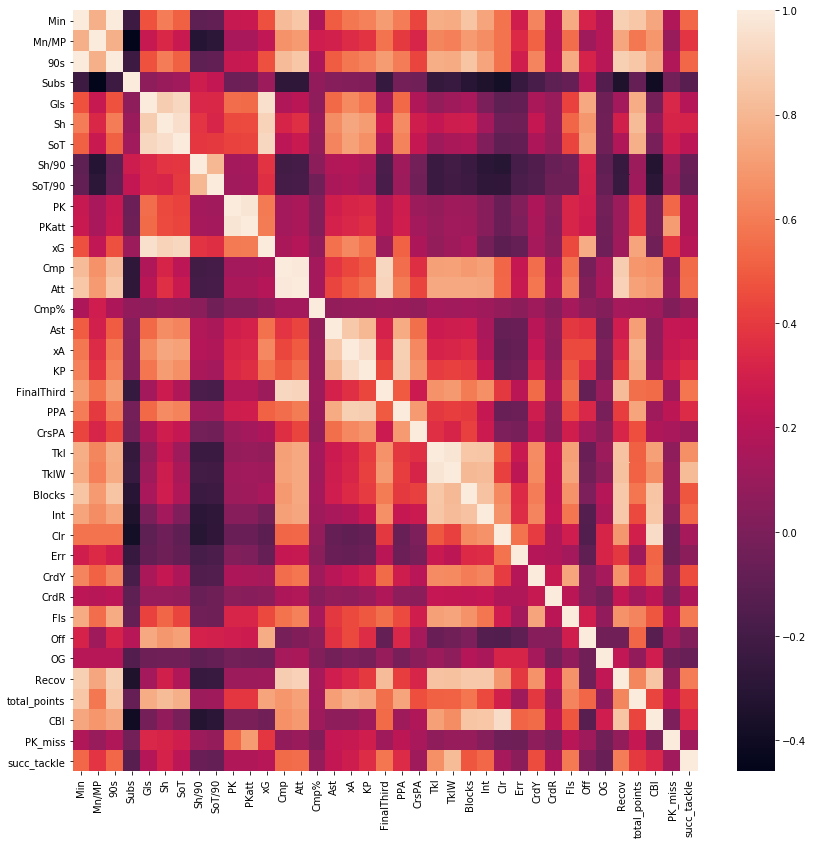

In [17]:
plt.figure(figsize=(14,14))
sns.heatmap(correlation)

There is very high correlation between the three variables related to minutes played (Min, Mn/MP, 90s). As these tell us essentially the same information, we can conclude multicollinearity.

CBI correlates highly with clearances, blocks and interceptions, and Tkl correlates highly with TklW.

High correlation between xG and Gls, Sh and SoT

Index(['total_points', '90s', 'Min', 'Sh', 'xA', 'SoT', 'Gls', 'KP', 'xG',
       'PPA', 'Att', 'Ast', 'Cmp', 'Recov', 'Fls'],
      dtype='object')


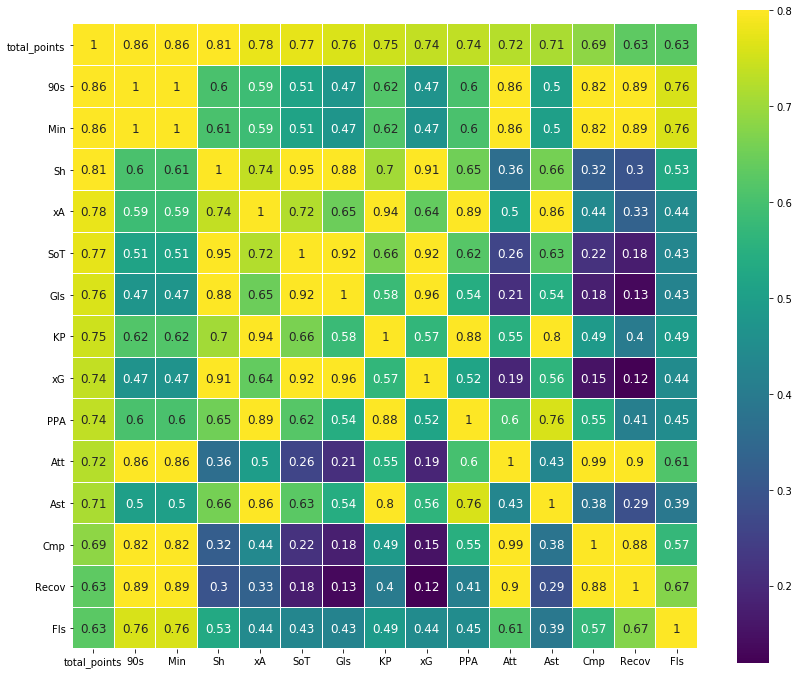

In [18]:
# total_points correlation matrix
k = 15
cols = correlation.nlargest(k, 'total_points')['total_points'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(14,12))
sns.heatmap(cm, vmax=0.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Observations:

A number of variables correlate strongly with 'total_points'.

90s and Min are very strongly correlated variables. This is because 90s is simply calculated by Min/38. Thus, we'll only keep 90s for analysis.

Pass attempts and completions correlate very strongly, so we keep only 'Att'. Loose ball recoveries also correlate strongly with pass attempts. This could be because the first action after a recovery is often a pass attempt.

xG correlates strongly with goals, shots and SoT.

From this correlation heat map, the features to be kept are: 90s, xA and xG. All other features are either too strongly correlated to these features, or are byproducts of playing a large number of 90s.


In [25]:
trimmed_df = num_features.copy()
trimmed_df.drop(['Min', 'Sh', 'SoT', 'Gls', 'KP', 'PPA', 'Cmp', 'Att', 'Ast', 'Fls'], axis=1, inplace=True)

Index(['total_points', '90s', 'xA', 'xG', 'Recov', 'Mn/MP', 'Blocks',
       'FinalThird', 'Off', 'TklW', 'Tkl', 'CrsPA', 'Int', 'CBI',
       'succ_tackle'],
      dtype='object')


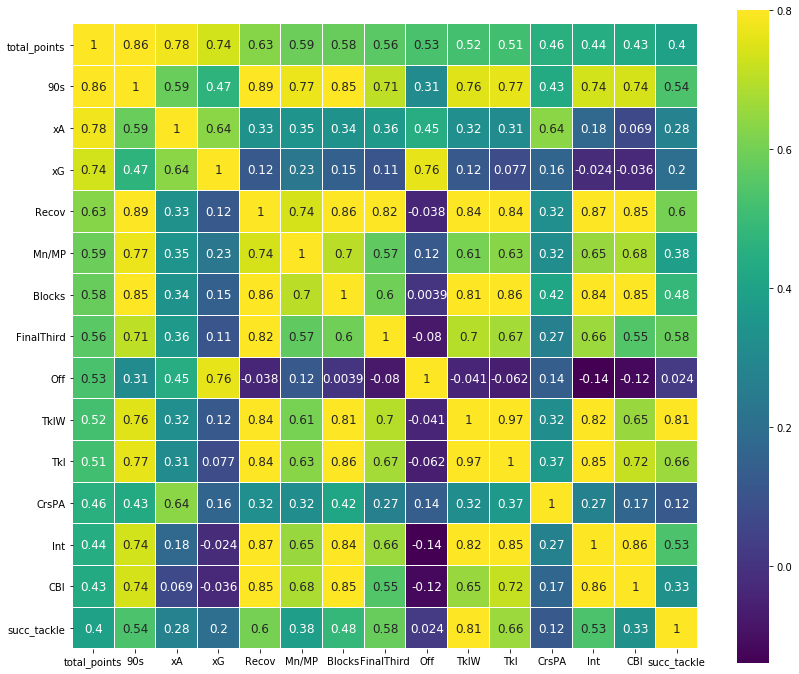

In [26]:
trimmed_corr = trimmed_df.corr()
k = 15
cols = trimmed_corr.nlargest(k, 'total_points')['total_points'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(14,12))
sns.heatmap(cm, vmax=0.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

From this, the features we will keep for our model are: 90s, xA, xG, Recov, CrsPA and succ_tackle